In [0]:
#Abro el archivo histórico
import re
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123456)

#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

link='https://drive.google.com/open?id=1BtUEu_2I-SXSnmSpjWDqKTMzhwwIU_jh' # The shareable link
fluff, id=link.split('=')
print(id) # Verify that you have everything after '='

#downloaded=drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('titulo+link.csv')  
#dftit=pd.read_csv('titulo+link.csv')
#dftit=dftit[dftit['link']!='/']
#dftit=dftit.drop(['Unnamed: 0'], axis=1)
#dftit=dftit.drop(['num_cat'], axis=1)

# Dataset is now stored in a Pandas Dataframe
link='https://drive.google.com/open?id=1eMXyqRWQElXeAJDmtEUKkHnoOTeWcPwW' # The shareable link
fluff, id=link.split('=')
print(id) # Verify that you have everything after '='

downloaded=drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cuerpo.csv')  
dftitfinal=pd.read_csv('cuerpo.csv')
lst_col=('Unnamed: 0', 'Unnamed: 0.1')
for c in lst_col:
  dftitfinal=dftitfinal.drop([c], axis=1)

dftitfinal

In [0]:
dftitfinal['cuerpo'][1]
dftitfinal.columns

Index(['link', 'titulo', 'categoria', 'num_cat', 'cuerpo'], dtype='object')

In [0]:
#Actualizo el archivo
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import re

########## ARMO DATAFRAME CON LOS LINKS DE LAS NOTAS PARA GENERAR EL MODELO ##########
link=[]
tit=[]
cat=[]
n=list(range(1,2))
topico=['https://buscar.lanacion.com.ar/economia/c-Econom%C3%ADa/page-','https://buscar.lanacion.com.ar/politica/c-Pol%C3%ADtica/page-',
        'https://buscar.lanacion.com.ar/cultura/c-Cultura/page-','https://buscar.lanacion.com.ar/personajes/c-Espect%C3%A1culos/page-',
        'https://buscar.lanacion.com.ar/sociedad/c-Sociedad/page-','https://buscar.lanacion.com.ar/turismo/c-Turismo/page-',
        'https://buscar.lanacion.com.ar/deportes/c-Deportes/page-']

for i in n:
    try:
        for t in topico:
          with urlopen(t+str(i)) as response:
              soup=BeautifulSoup(response,'html.parser')
              h2=soup.find_all('h2')
              title=soup.find_all('title')
              for h in h2:                
                if h.a['href']!="/":
                  tit.append(h.a.text.strip())
                  link.append(h.a['href'])  
                  for t in title:
                    cat.append(t.text.split('-')[0].strip())        
    except:
        pass  
    
dicc={'link':link,'titulo':tit,'categoria':cat}
dftitnew=pd.DataFrame(dicc)

In [67]:
dftitnew

,link,titulo,categoria
0,http://www.lanacion.com.ar/2378169-la-respuest...,"La respuesta de Vicentin: ""No estamos de acuer...",economia
1,http://www.lanacion.com.ar/2377007-como-es-eco...,Cómo es la economía intermintente post coronav...,economia
2,http://www.lanacion.com.ar/2377908-uruguay-fav...,Uruguay favorece la radicación de empresas y f...,economia
3,http://www.lanacion.com.ar/2377801-mercado-lib...,Mercado Libre. Se expande en Colombia y contra...,economia
4,http://www.lanacion.com.ar/2376354-vicentin-un...,Vicentin. Una carga más para la economía y una...,economia
...,...,...,...
65,http://www.lanacion.com.ar/2377872-coronavirus...,Coronavirus. Sin protocolo: Djokovic armó un t...,deportes
66,http://www.lanacion.com.ar/2377692-lando-norri...,"Lando Norris, el piloto de Fórmula 1 que perdi...",deportes
67,http://www.lanacion.com.ar/2377253-coronavirus...,Coronavirus. Las provincias pueden habilitar l...,deportes
68,http://www.lanacion.com.ar/2377368-tokio-piens...,Tokio piensa en más de 200 ideas para abaratar...,deportes


In [0]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import spacy

from pathlib import Path
#fileContent = Path(url).read_text()
sw = list(set(stopwords.words('spanish'))) ##### DEFINO UN DICCIONARIO DE STOP WORDS

link='https://drive.google.com/open?id=1BeMeA3GQma9Femlj-2psxinv0B6wgvav' # The shareable link
fluff, id=link.split('=')
print(id) # Verify that you have everything after '='
#downloaded=drive.CreateFile({'id':id}) 
downloaded.GetContentFile('stopwords1.txt')  
f=open("stopwords1.txt", "r")
stopwords1 = list()
with f as f:
  for line in f:
    stopwords1.append(line)
  stopwords1 = [line.rstrip('\n') for line in stopwords1]

def norm_text(text):
  text = text.lower()
  
  # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
  text=re.sub('\s\W',' ',text)
  text=re.sub('\W\s',' ',text)

  # elimino palabras con 2 letras
  text=re.sub(r'\W*\b\w{1,2}\b', '',text)
  
  # make sure we didn't introduce any double spaces
  text=re.sub('\s+',' ',text)
  
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
1BeMeA3GQma9Femlj-2psxinv0B6wgvav


In [0]:
#retoques a los titulos
dftitfinal['tit_norm']=[norm_text(text) for text in dftitfinal['titulo']]
dftitfinal['tit_stpwd']=dftitfinal['tit_norm'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
dftitfinal['tit_stpwd']=dftitfinal['tit_stpwd'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords1))
#retoques a los cuerpos de las notas
dftitfinal['cuerpo_norm']=[norm_text(text) for text in dftitfinal['cuerpo']]
dftitfinal['cuerpo_stpwd']=dftitfinal['cuerpo_norm'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
dftitfinal['cuerpo_stpwd']=dftitfinal['cuerpo_stpwd'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords1))

In [0]:
#dftit=[]
#dftit=pd.concat([dftitnew,dftitfinal])
#dftit=dftit[dftit['link']!='/']
dftitnew=dftitnew[dftitnew['link']!='/']

#eliminar duplicados
##dftit[dftit['link'].isin(dftit['link'][dftit['link'].duplicated()])]
#dftit.drop_duplicates(subset='link', keep='first', inplace=True)

lst_ncat=range(0,len(dftitnew['categoria'].unique()),1)
lst_cat=dftitnew['categoria'].unique()
dicc={'num_cat':lst_ncat,'categoria':lst_cat}
#dfcat=pd.DataFrame(dicc)
dftitnew=pd.merge(dftitnew[['link','titulo','categoria']],dfcat[['categoria','num_cat']],how='left',on='categoria')
dftitnew

from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
dftitnew.to_csv('/content/drive/My Drive/PROGRAMACION/TRABAJO FINAL/actualiza_titulo+link.csv')
#!cp actualiza_titulo+link.csv "drive/My Drive/"
#files.download('actualiza_titulo+link.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# pull the data into vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dftitfinal['cuerpo_stpwd'])

encoder = LabelEncoder()
y = encoder.fit_transform(dftitfinal['categoria'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19134, 243138)
(19134,)
(4784, 243138)
(4784,)


In [0]:
%%time 
nb = MultinomialNB()
nb.fit(x_train, y_train)
print(nb.score(x_test, y_test))

0.8977842809364549
CPU times: user 316 ms, sys: 4.2 ms, total: 320 ms
Wall time: 323 ms


In [0]:
x_test_pred = nb.predict(x_test)
confusion_matrix(y_test, x_test_pred)

array([[ 485,    2,    6,   24,   27,   22,    7],
       [   1,  847,    2,    3,    2,    8,    2],
       [   5,    2,  457,    2,   31,   24,    5],
       [  21,    3,    0, 1030,    4,   14,    0],
       [   5,    0,   36,    2,  517,   15,    1],
       [  41,   13,   20,   35,   34,  410,   21],
       [   9,    6,   11,   10,    0,   13,  549]])

In [0]:
print(classification_report(y_test, x_test_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

     cultura       0.86      0.85      0.85       573
    deportes       0.97      0.98      0.97       865
    economia       0.86      0.87      0.86       526
  personajes       0.93      0.96      0.95      1072
    politica       0.84      0.90      0.87       576
    sociedad       0.81      0.71      0.76       574
     turismo       0.94      0.92      0.93       598

    accuracy                           0.90      4784
   macro avg       0.89      0.88      0.88      4784
weighted avg       0.90      0.90      0.90      4784



In [0]:
def make_reverse_vocabulary(vectorizer):
    revvoc = {}

    vocab = vectorizer.vocabulary_
    for w in vocab:
        i = vocab[w]

        revvoc[i] = w

    return revvoc

make_reverse_vocabulary(vectorizer)

{56055: 'comentar',
 113817: 'gusta',
 56575: 'compartir',
 144768: 'mail',
 230091: 'twitter',
 98842: 'facebook',
 238835: 'whatsapp',
 113044: 'guardar',
 9007: 'abril',
 2324: '2020',
 182473: 'primer',
 124069: 'indicio',
 128535: 'invierno',
 9450: 'acaba',
 141334: 'llegarles',
 126887: 'intendentes',
 61458: 'conurbano',
 190281: 'recaudación',
 220962: 'tasas',
 206836: 'seguridad',
 117182: 'higiene',
 54440: 'cobran',
 56174: 'comercios',
 86823: 'empresas',
 62917: 'corresponde',
 36695: 'bimestre',
 88330: 'enero',
 100385: 'febrero',
 48432: 'cayó',
 115550: 'hasta',
 65543: 'cuarentena',
 25257: 'arrancó',
 76028: 'después',
 151770: 'mes',
 170715: 'pasado',
 156906: 'motivo',
 207157: 'semejante',
 75788: 'desplome',
 170666: 'parálisis',
 83551: 'económica',
 184740: 'provoca',
 15227: 'aislamiento',
 210706: 'sino',
 68851: 'decisión',
 82107: 'drástica',
 61313: 'contribuyentes',
 168427: 'pagar',
 21036: 'anticipándose',
 190380: 'recesión',
 125238: 'ingresos',
 1

In [0]:
voc_freq=make_reverse_vocabulary(vectorizer)
voc_freq=pd.DataFrame(voc_freq.items())
voc_freq.columns=['freq','word'] 
voc_freq=voc_freq.sort_values('freq',ascending=False)
#voc_freq.to_csv('/content/drive/My Drive/PROGRAMACION/TRABAJO FINAL/voc_freq.csv')
voc_freq

,freq,word
218081,243137,ćak
205377,243136,þingvellir
27763,243135,þeudo
139372,243134,üsküdar
207168,243133,ürgüp
...,...,...
157789,4,00011
202511,3,0001
213342,2,00001
78208,1,0000


In [0]:
def predict_cat(title):
    cod=nb.predict(vectorizer.transform([title]))
    return encoder.inverse_transform(cod)[0]

In [0]:
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Links que funcionan:"https://cronista.com/","https://ambito.com/","https://iprofesional.com/"

#Links que NO funcionan:
#"https://lanacion.com.ar/","https://página12.com.ar"


#Rellenar lista con diarios de interés:
diarios=["https://cronista.com/"]
#,"https://ambito.com/","https://iprofesional.com/"]


maestro=[]
for i in diarios:
  page = requests.get(i)
  page.content

  soup=BeautifulSoup(page.content,"html.parser")

  A1=soup.select("a[title]")

  text=[]
  for i in range(len(A1)):
    A0=A1[i].get_text()
    if A0.count(" ")>4:
      text.append(A0)
    else:
      continue

text={'titulo':text}
text=pd.DataFrame(text)
text['tit_norm']=[norm_text(text) for text in text['titulo']]
text['tit_stpwd']=text['tit_norm'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
text['tit_stpwd']=text['tit_stpwd'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords1))
text['tit_pred']=[predict_cat(text) for text in text['tit_stpwd']]

#from google.colab import files
#text.to_csv('/content/drive/My Drive/PROGRAMACION/TRABAJO FINAL/predict_titulo.csv')


In [0]:
text.loc[(text['tit_pred']=='deportes')]

,titulo,tit_norm,tit_stpwd,tit_pred
8,\n\t\t\t\t\t\tCoronavirus: qué pasa con el olf...,coronavirus qué pasa con olfato gusto,coronavirus pasa olfato gusto,deportes
22,\nCoronavirus: lo que hay que saber\n,coronavirus que hay que saber,coronavirus saber,deportes
58,\n\t\t\t\t\t\t\tEE.UU. marca un récord en cant...,marca récord cantidad muertos por coronavirus...,marca récord cantidad muertos coronavirus vuel...,deportes


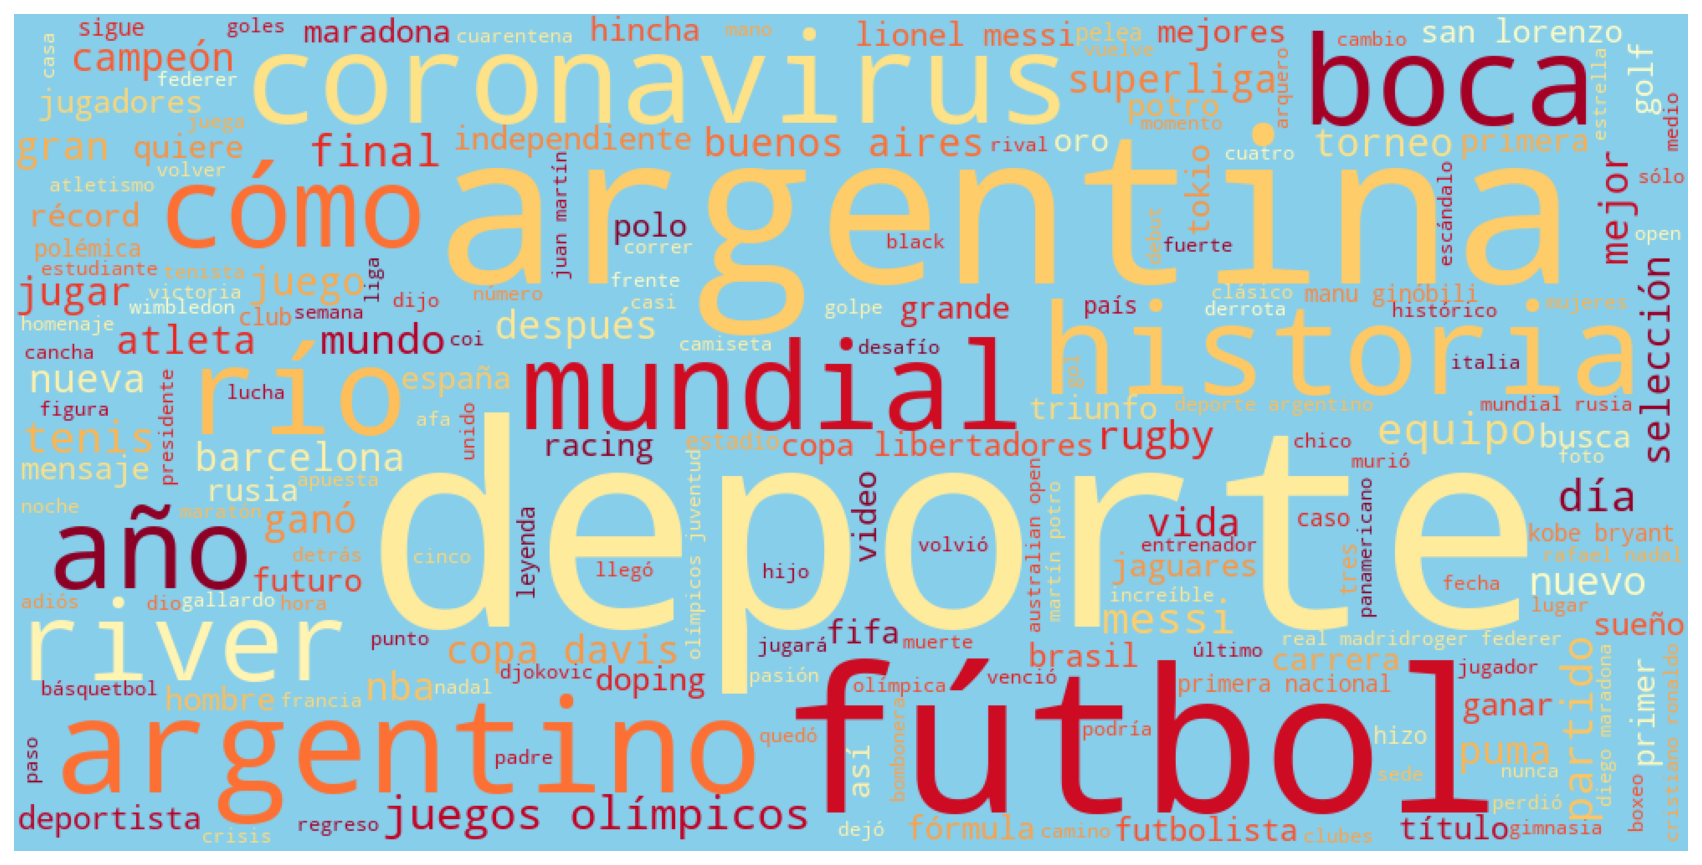

In [0]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

corpus = ' '.join(dftit['tit_stpwd'][dftit['categoria']=='deportes'])
corpus
wordcloud = WordCloud(width = 1000, height = 500, background_color="skyblue", colormap="YlOrRd").generate(corpus)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("nube"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [0]:
!pip install newspaper3k
from bs4 import BeautifulSoup
from urllib.request import urlopen
from flask import request
import pandas as pd
import re
import requests
from newspaper import fulltext

inter=[]
link=[]
cuerpo=[]
#for l in dftitnew['link'].loc[(dftit['categoria']=='politica')]:    
for l in dftitnew['link']:    
    try:
      html=requests.get(l).text
      text=fulltext(html)
      link.append(l)
      cuerpo.append(text)
      #with urlopen(l) as response:
        #soup=BeautifulSoup(response,'html.parser')
        #h2=soup.find_all('h2')
        #p=soup.find_all('p')
        #for anchor in h2:            
                #link.append(anchor.a['href'])
                
                #for anchor in p:
                  #inter.append(anchor.text)
                #inter=' '.join([str(item) for item in inter])
                #cuerpo.append(inter)
                #inter=[]                
    except:
        pass

dicc={'link':link,'cuerpo':cuerpo}
dfcuerpo=pd.DataFrame(dicc)

#from google.colab import drive
#drive.mount('/content/drive')
#from google.colab import files
#dfcuerpo.to_csv('/content/drive/My Drive/PROGRAMACION/TRABAJO FINAL/cuerponew.csv')
#!cp cuerpo.csv "drive/My Drive/"
#files.download('cuerpo.csv')

dfcuerpo

  Using cached https://files.pythonhosted.org/packages/d7/b9/51afecb35bb61b188a4b44868001de348a0e8134b4dfa00ffc191567c4b9/newspaper3k-0.2.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/d4/3b5c17f00cce85b9a1e6f91096e1cc8e8ede2e1be8e96b87ce1ed09e92c5/cssselect-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fd/0e/9ab599d6e78f0340bb1d1e28ddeacb38c8bb7f91a1b0eae9a24e9603782f/tldextract-2.2.2-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34/jieba3k-0.35.1-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/d8/7d37fec71ff7c9dbcdd80d2b48bcdd86d6af502156fc93846fb0102cb2c4/feedparser-5.2.1.tar.bz2
Processing /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02/tinysegmenter-0.3-cp36-none-any.whl
Processing /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed/feedfinder2-0.0.4-cp36-

,link,cuerpo
0,http://www.lanacion.com.ar/2375686-lopez-murph...,"López Murphy, en el programa ""Comunidad de Neg..."
1,http://www.lanacion.com.ar/2374390-sobrecarga-...,En tiempos en los que millones de personas tra...
2,http://www.lanacion.com.ar/2374638-la-pandemia...,Comentar Me gusta Me gusta Compartir E-mail Tw...
3,http://www.lanacion.com.ar/2374636-ivan-wernin...,Iván Werning Crédito: Irina Werning\n\nSofía D...
4,http://www.lanacion.com.ar/2375321-la-debilida...,Alberto Fernández junto a los gobernadores\n\n...
...,...,...
1312,http://www.lanacion.com.ar/2224873-dublin-los-...,Rossana Acquasanta Comentar Me gusta Me gusta ...
1313,http://www.lanacion.com.ar/1963455-turismo-minero,Comentar Me gusta Me gusta Compartir E-mail Tw...
1314,http://www.lanacion.com.ar/2357624-coronavirus...,"Un ""cheque"" en manos de futbolistas de la Arge..."
1315,http://www.lanacion.com.ar/2348912-coronavirus...,"Wimbledon, el torneo de tenis más importante d..."


In [0]:
#dftit.loc[(dftit['categoria']=='economia')]
dfcuerpo

In [0]:
!pip install newspaper3k
from newspaper import Article

url = 'https://www.lanacion.com.ar/deportes/polo/gonzalo-heguy-a-20-anos-del-repentino-nid2350294'
article = Article(url)
article.download()
article.html
article.parse()

     |████████████████████████████████| 215kB 2.7MB/s 
     |████████████████████████████████| 194kB 7.3MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 7.4MB 9.4MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=4c387e5617b74410869aba434bd49fc4ed31dd17be3956217e68ab143517185a
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=8acb89394e0de9c8ce1ba0ee574fd618702b2706b5a3ca5d20cefa391c460337
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=19480070fceaa3632805f36e9899edf173269bc7d315a5dc4294616a22d73f08
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da206

In [0]:
article.authors

[]

In [0]:
article.publish_date

datetime.datetime(2020, 4, 6, 0, 1, tzinfo=tzlocal())

In [0]:
article.text

'Gonzalo Heguy, el motor de aquel Indios Chapaleufú Fuente: LA NACION\n\nClaudio Cerviño Comentar Me gusta Me gusta Compartir E-mail Twitter Facebook WhatsApp Guardar 6 de abril de 2020 • 00:01\n\nViernes 19 de mayo de 1995. En uno de los pasillos del hospital Prince Charles Eye Unit, en las cercanías del Castillo de Windsor, en Londres, Gonzalo Heguy enfilaba hacia la habitación donde se recuperaba su hermano mellizo. Un momento muy sensible para la familia: el día anterior, Horacito había perdido el ojo derecho por un bochazo jugando un partido de polo, el deporte que los apasionó casi desde que estaban juntos en el vientre de Norita Amadeo y Videla de Heguy. Gonzalo frenó su marcha, volvió sobre sus pasos y nos dijo: "¿Sabés qué? A pesar de esto, vamos a jugar Palermo en noviembre. Los cuatro. Y lo vamos a ganar igual. Porque yo voy a jugar por mi y también por él".\n\nNo tenía soberbia en su mirada. Estaba enojado quizá con el destino que se había ensañado desde hacía tiempo con es

In [0]:
article.top_image

'https://bucket3.glanacion.com/anexos/fotos/86/3226986.jpg'

In [0]:
article.movies

['https://www.youtube.com/embed/oPupHAUQqVc']

In [0]:
import nltk
nltk.download('punkt')
article.nlp()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
article.keywords

['hermanos',
 'recuerdan',
 'los',
 'el',
 'gonzalo',
 'huella',
 'en',
 'su',
 'se',
 'repentino',
 'que',
 'la',
 'heguy',
 'polista',
 'lo',
 'y']

In [0]:
article.summary

'Un día iba manejando acompañado por una tía (Mónica), que de pronto advirtió que Gonzalo entrecerraba uno de sus ojos por momentos.\nGonzalo y la BillonariaEl destino le arrebató la vida a Gonzalo esa mañana del 2000 y Chapaleufú nunca volvió a ser el mismo.\nDejó huella en gente que lo conoció poco y en gente que lo conoció mucho Marcos Heguy"La muerte de Gonzalo sería una de las cosas que cambiaría en la vida si pudiera.\nDejó huella en gente que lo conoció poco y en gente que lo conoció mucho", reflexiona desde La Pampa su hermano Marcos.\nCapaz que hoy, mucho después, veo que ese Chapaleufú fue mejor de lo que nosotros creíamos.'

In [0]:
import newspaper

cnn_paper = newspaper.build('https://www.lanacion.com.ar/')

for article in cnn_paper.articles:
  print(article.url)

for category in cnn_paper.category_urls():
  print(category)

https://www.lanacion.com.ar/
https://micuenta.lanacion.com.ar
https://club.lanacion.com.ar
https://recetas.lanacion.com.ar
https://pdf.lanacion.com.ar
https://www.lanacion.com.ar
https://lnmas.lanacion.com.ar
http://servicios.lanacion.com.ar
https://suscripciones.lanacion.com.ar
https://servicios.lanacion.com.ar


In [0]:
cnn_paper.category_urls 

<bound method Source.category_urls of <newspaper.source.Source object at 0x7fb9d5ee2128>>

In [0]:
#cnn_article = cnn_paper.articles[0]
article.download()
article.parse()
article.nlp()

In [0]:
from newspaper import fulltext
import requests
html = requests.get(url).text
text = fulltext(html)
url
text

'Gonzalo Heguy, el motor de aquel Indios Chapaleufú Fuente: LA NACION\n\nClaudio Cerviño Comentar Me gusta Me gusta Compartir E-mail Twitter Facebook WhatsApp Guardar 6 de abril de 2020 • 00:01\n\nViernes 19 de mayo de 1995. En uno de los pasillos del hospital Prince Charles Eye Unit, en las cercanías del Castillo de Windsor, en Londres, Gonzalo Heguy enfilaba hacia la habitación donde se recuperaba su hermano mellizo. Un momento muy sensible para la familia: el día anterior, Horacito había perdido el ojo derecho por un bochazo jugando un partido de polo, el deporte que los apasionó casi desde que estaban juntos en el vientre de Norita Amadeo y Videla de Heguy. Gonzalo frenó su marcha, volvió sobre sus pasos y nos dijo: "¿Sabés qué? A pesar de esto, vamos a jugar Palermo en noviembre. Los cuatro. Y lo vamos a ganar igual. Porque yo voy a jugar por mi y también por él".\n\nNo tenía soberbia en su mirada. Estaba enojado quizá con el destino que se había ensañado desde hacía tiempo con es